# Mediciones para Backtracking

### Imports

In [14]:
import time
import random
import matplotlib.pyplot as plt
from fuerza_bruta import empaquetamiento_fb

### Funciones

In [15]:
def generar_arreglo_aleatorio(n):
    return [random.randint(1, 10) / 10 for _ in range(n)]

In [16]:
def obtener_tiempos(n_max):
    tiempos = []
    for i in range(1, n_max + 1):
        arreglo = generar_arreglo_aleatorio(i)
        # print(arreglo)
        start_time = time.time()
        empaquetamiento_fb(arreglo)
        end_time = time.time()
        tiempos.append(end_time - start_time)
    return tiempos


### Gráfico

In [17]:
n_max = 1000
cantidades = [i for i in range(1, n_max + 1)]

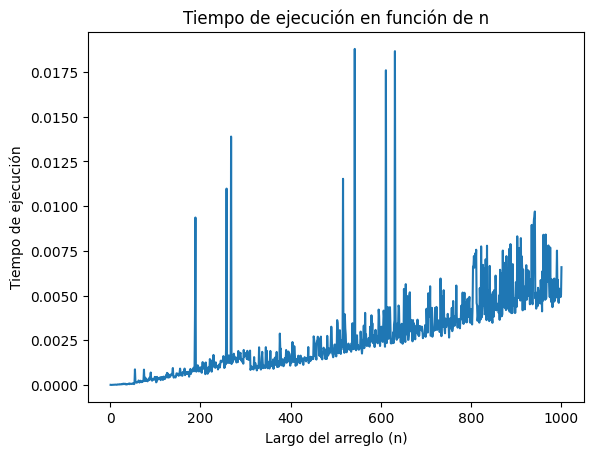

In [18]:
tiempos = obtener_tiempos(n_max)
plt.plot(cantidades, tiempos)
plt.title('Tiempo de ejecución en función de n')
plt.xlabel('Largo del arreglo (n)')
plt.ylabel('Tiempo de ejecución')
plt.show()